In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# To load the file
df=pd.read_csv('crime_data.csv', low_memory=False)


In [3]:
#to print the file.
df


,Offence Code,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Number of Offences,Old PRC offence group,Old offence sub-group,New ONS offence group,New ONS sub-offence group
0,12,2012/13,1,Avon and Somerset,Abandoning child under two years (outcomes only),Violence against the person,Violence without injury,0,Violence against the person,Violence against the person - without injury,Violence against the person,Violence without injury
1,80,2012/13,1,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,1,Other miscellaneous offences,NaN,Miscellaneous crimes against society,Miscellaneous crimes against society
2,71,2012/13,1,Avon and Somerset,Abuse of children through prostitution and por...,Sexual offences,Other sexual offences,0,Sexual offences,Most serious sexual crime,Sexual offences,Other sexual offences
3,73,2012/13,1,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,3,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences
4,8G,2012/13,1,Avon and Somerset,Actually bodily harm and other injury(outcomes...,Violence against the person,Violence with injury,0,Violence against the person,Violence against the person - with injury,Violence against the person,Violence with injury
...,...,...,...,...,...,...,...,...,...,...,...,...
248419,72,2023/24,1,Wiltshire,Trafficking for sexual exploitation,Sexual offences,Other sexual offences,0,Sexual offences,Most serious sexual crime,Sexual offences,Other sexual offences
248420,92A,2023/24,1,Wiltshire,Trafficking in controlled drugs,Drug offences,Trafficking of drugs,69,Drug offences,NaN,Drug offences,Trafficking of drugs
248421,88D,2023/24,1,Wiltshire,Unnatural sexual offences,Sexual offences,Other sexual offences,0,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences
248422,88D,2023/24,1,Wiltshire,Unnatural sexual offences,Sexual offences,Other sexual offences,0,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences


# Data Cleaning & Pre-processing

In [4]:
# shows top rows record
df.head()

,Offence Code,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Number of Offences,Old PRC offence group,Old offence sub-group,New ONS offence group,New ONS sub-offence group
0,12,2012/13,1,Avon and Somerset,Abandoning child under two years (outcomes only),Violence against the person,Violence without injury,0,Violence against the person,Violence against the person - without injury,Violence against the person,Violence without injury
1,80,2012/13,1,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,1,Other miscellaneous offences,NaN,Miscellaneous crimes against society,Miscellaneous crimes against society
2,71,2012/13,1,Avon and Somerset,Abuse of children through prostitution and por...,Sexual offences,Other sexual offences,0,Sexual offences,Most serious sexual crime,Sexual offences,Other sexual offences
3,73,2012/13,1,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,3,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences
4,8G,2012/13,1,Avon and Somerset,Actually bodily harm and other injury(outcomes...,Violence against the person,Violence with injury,0,Violence against the person,Violence against the person - with injury,Violence against the person,Violence with injury


In [5]:
#shows last two rows of dataset
df.tail(2)

,Offence Code,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Number of Offences,Old PRC offence group,Old offence sub-group,New ONS offence group,New ONS sub-offence group
248422,88D,2023/24,1,Wiltshire,Unnatural sexual offences,Sexual offences,Other sexual offences,0,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences
248423,62A,2023/24,1,Wiltshire,Violent disorder,Public order offences,Public order offences,0,Other miscellaneous offences,NaN,Public order offences,Public order offences


In [6]:
# Display the shape of the dataset(number of columns & rows)
df.shape

(248424, 12)

In [7]:
#Getting info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248424 entries, 0 to 248423
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Offence Code               248424 non-null  object
 1   Financial Year             248424 non-null  object
 2   Financial Quarter          248424 non-null  int64 
 3   Force Name                 248424 non-null  object
 4   Offence Description        248424 non-null  object
 5   Offence Group              248424 non-null  object
 6   Offence Subgroup           248424 non-null  object
 7   Number of Offences         248424 non-null  object
 8   Old PRC offence group      248424 non-null  object
 9   Old offence sub-group      138556 non-null  object
 10  New ONS offence group      248424 non-null  object
 11  New ONS sub-offence group  248424 non-null  object
dtypes: int64(1), object(11)
memory usage: 22.7+ MB


In [8]:
# To check the dat type of the dataset
df.dtypes

Offence Code                 object
Financial Year               object
Financial Quarter             int64
Force Name                   object
Offence Description          object
Offence Group                object
Offence Subgroup             object
Number of Offences           object
Old PRC offence group        object
Old offence sub-group        object
New ONS offence group        object
New ONS sub-offence group    object
dtype: object

In [9]:
# Check for and handle missing values

missing_values = df.isnull().sum()
missing_values

Offence Code                      0
Financial Year                    0
Financial Quarter                 0
Force Name                        0
Offence Description               0
Offence Group                     0
Offence Subgroup                  0
Number of Offences                0
Old PRC offence group             0
Old offence sub-group        109868
New ONS offence group             0
New ONS sub-offence group         0
dtype: int64

In [10]:
#replaced missing values with no values
df = df.fillna('none')

In [11]:
#to show statistical summary of all data set
summary_statistics=df.describe(include='all')
print(summary_statistics)

       Offence Code Financial Year  Financial Quarter         Force Name  \
count        248424         248424      248424.000000             248424   
unique          155             12                NaN                 44   
top             88A        2012/13                NaN  Avon and Somerset   
freq           3960          28336                NaN               5646   
mean            NaN            NaN           2.467588                NaN   
std             NaN            NaN           1.127192                NaN   
min             NaN            NaN           1.000000                NaN   
25%             NaN            NaN           1.000000                NaN   
50%             NaN            NaN           2.000000                NaN   
75%             NaN            NaN           3.000000                NaN   
max             NaN            NaN           4.000000                NaN   

       Offence Description                Offence Group  \
count               248424  

In [12]:
# to rename the column names
df.rename(columns={'Offence Code': 'offence_code', 'Financial Year': 'financial_year','Financial Quarter':'financial_quarter',
        'Force Name':'force_name',
        'Offence Description':'offence_description','Offence Group':'offence_group','Offence Subgroup':'offence_subgroup',
        'Number of Offences':'number_of_offences','Old PRC offence group':'old_prc_offence_group',
                   'Old offence sub-group':'old_offence_sub-group','New ONS offence group':'new_ons_offence_group',
                   'New ONS sub-offence group':'new_ons_sub_offence_group'}, inplace=True)

df

,offence_code,financial_year,financial_quarter,force_name,offence_description,offence_group,offence_subgroup,number_of_offences,old_prc_offence_group,old_offence_sub-group,new_ons_offence_group,new_ons_sub_offence_group
0,12,2012/13,1,Avon and Somerset,Abandoning child under two years (outcomes only),Violence against the person,Violence without injury,0,Violence against the person,Violence against the person - without injury,Violence against the person,Violence without injury
1,80,2012/13,1,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,1,Other miscellaneous offences,none,Miscellaneous crimes against society,Miscellaneous crimes against society
2,71,2012/13,1,Avon and Somerset,Abuse of children through prostitution and por...,Sexual offences,Other sexual offences,0,Sexual offences,Most serious sexual crime,Sexual offences,Other sexual offences
3,73,2012/13,1,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,3,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences
4,8G,2012/13,1,Avon and Somerset,Actually bodily harm and other injury(outcomes...,Violence against the person,Violence with injury,0,Violence against the person,Violence against the person - with injury,Violence against the person,Violence with injury
...,...,...,...,...,...,...,...,...,...,...,...,...
248419,72,2023/24,1,Wiltshire,Trafficking for sexual exploitation,Sexual offences,Other sexual offences,0,Sexual offences,Most serious sexual crime,Sexual offences,Other sexual offences
248420,92A,2023/24,1,Wiltshire,Trafficking in controlled drugs,Drug offences,Trafficking of drugs,69,Drug offences,none,Drug offences,Trafficking of drugs
248421,88D,2023/24,1,Wiltshire,Unnatural sexual offences,Sexual offences,Other sexual offences,0,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences
248422,88D,2023/24,1,Wiltshire,Unnatural sexual offences,Sexual offences,Other sexual offences,0,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences


In [13]:
# to check the number of of offences for non numeric values
non_numeric_values = df[~df['number_of_offences'].astype(str).str.isnumeric()]['number_of_offences']
non_numeric_values

12        2,064
13        2,064
15        1,573
26        1,655
40        1,721
          ...  
178510    1,302
178512    1,037
178527    1,335
178528    1,335
178530    1,421
Name: number_of_offences, Length: 2854, dtype: object

In [14]:

# Convert 'number_of_offences' to numeric after removing commas

df['number_of_offences'] = pd.to_numeric(df['number_of_offences'].str.replace(',', ''), errors='coerce')

# Now 'Number of Offences' column is of integer data type with absolute values
df['number_of_offences'] =df['number_of_offences'].abs()

# Check the data type of the column after conversion
df['number_of_offences'].dtypes

dtype('int64')

In [15]:
#To check the duplicate rows in the data set

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
248419    False
248420    False
248421    False
248422     True
248423    False
Length: 248424, dtype: bool

In [16]:
# Drop duplicate rows

df= df.drop_duplicates()


In [17]:
df.shape

(236016, 12)

# Outlier Detection and Removal

<Axes: >

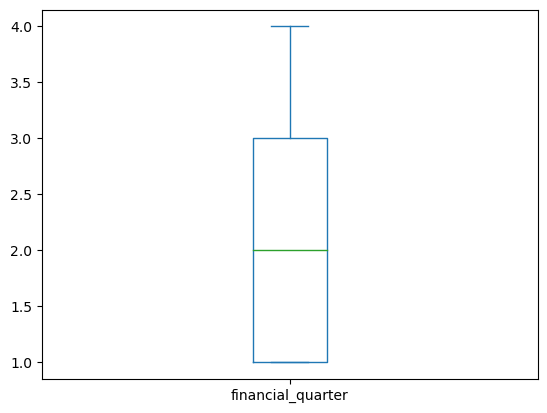

In [18]:
# To check the outlier
df['financial_quarter'].plot(kind='box')


In [19]:
# To check the outlier
df['number_of_offences'].describe()


count    236016.000000
mean        196.026049
std         805.035799
min           0.000000
25%           0.000000
50%           9.000000
75%          76.000000
max       29480.000000
Name: number_of_offences, dtype: float64

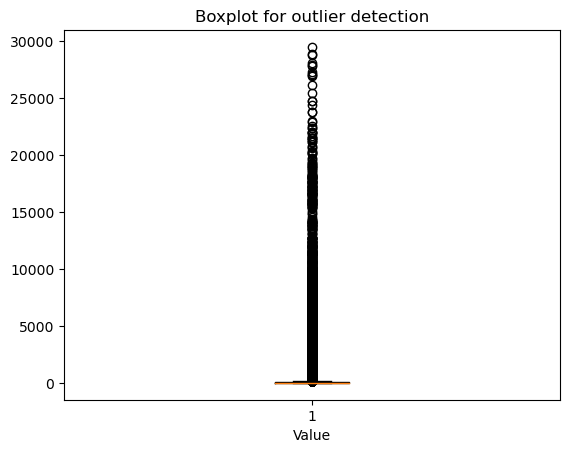

In [20]:
# Check for outliers using box plots


plt.boxplot(df['number_of_offences'])
plt.title('Boxplot for outlier detection')
plt.xlabel('Value')
plt.show()


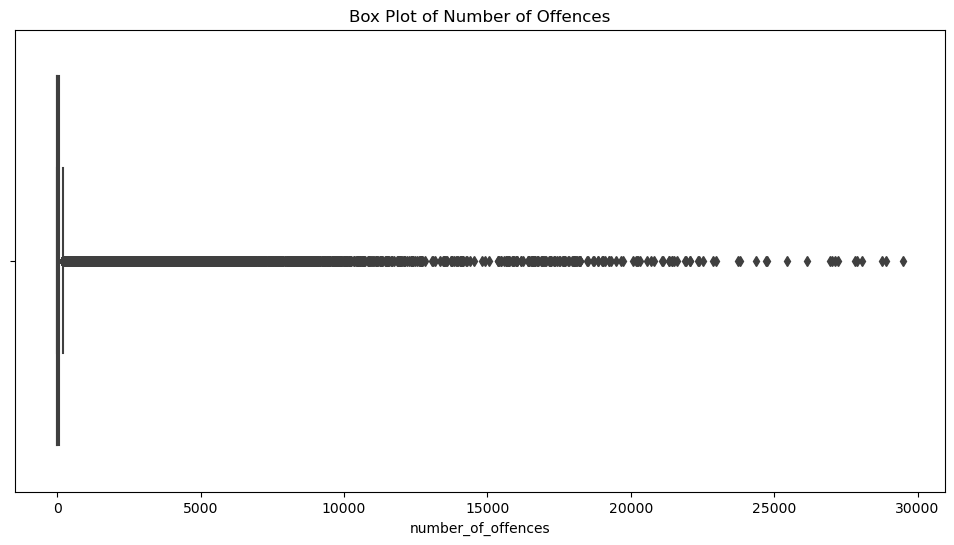

In [21]:
# Check for outliers using box plots

plt.figure(figsize=(12,6))
sns.boxplot(x='number_of_offences', data=df)
plt.title('Box Plot of Number of Offences')
plt.show()

In [22]:

# Save the dataframe to a CSV file
df.to_csv('clean&preprocessed_data.csv', index=False)

# Specify the local file path where you want to save the preprocessed DataFrame
local_file_path = 'C:/Users/HP/DAT_FINAL_PROJECT/clean&preprocessed_data.csv'

# Save the preprocessed DataFrame to a CSV file on your local system
df.to_csv(local_file_path, index=False)

In [23]:
new_data=pd.read_csv('C:/Users/HP/DAT_FINAL_PROJECT/clean&preprocessed_data.csv')

In [24]:
new_data

,offence_code,financial_year,financial_quarter,force_name,offence_description,offence_group,offence_subgroup,number_of_offences,old_prc_offence_group,old_offence_sub-group,new_ons_offence_group,new_ons_sub_offence_group
0,12,2012/13,1,Avon and Somerset,Abandoning child under two years (outcomes only),Violence against the person,Violence without injury,0,Violence against the person,Violence against the person - without injury,Violence against the person,Violence without injury
1,80,2012/13,1,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,1,Other miscellaneous offences,none,Miscellaneous crimes against society,Miscellaneous crimes against society
2,71,2012/13,1,Avon and Somerset,Abuse of children through prostitution and por...,Sexual offences,Other sexual offences,0,Sexual offences,Most serious sexual crime,Sexual offences,Other sexual offences
3,73,2012/13,1,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,3,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences
4,8G,2012/13,1,Avon and Somerset,Actually bodily harm and other injury(outcomes...,Violence against the person,Violence with injury,0,Violence against the person,Violence against the person - with injury,Violence against the person,Violence with injury
...,...,...,...,...,...,...,...,...,...,...,...,...
236011,3B,2023/24,1,Wiltshire,Threats to kill,Violence against the person,Violence without injury,37,Violence against the person,Violence against the person - without injury,Violence against the person,Violence without injury
236012,72,2023/24,1,Wiltshire,Trafficking for sexual exploitation,Sexual offences,Other sexual offences,0,Sexual offences,Most serious sexual crime,Sexual offences,Other sexual offences
236013,92A,2023/24,1,Wiltshire,Trafficking in controlled drugs,Drug offences,Trafficking of drugs,69,Drug offences,none,Drug offences,Trafficking of drugs
236014,88D,2023/24,1,Wiltshire,Unnatural sexual offences,Sexual offences,Other sexual offences,0,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences


In [25]:
new_data.isnull().sum()

offence_code                 0
financial_year               0
financial_quarter            0
force_name                   0
offence_description          0
offence_group                0
offence_subgroup             0
number_of_offences           0
old_prc_offence_group        0
old_offence_sub-group        0
new_ons_offence_group        0
new_ons_sub_offence_group    0
dtype: int64

In [26]:
new_data.head()

,offence_code,financial_year,financial_quarter,force_name,offence_description,offence_group,offence_subgroup,number_of_offences,old_prc_offence_group,old_offence_sub-group,new_ons_offence_group,new_ons_sub_offence_group
0,12,2012/13,1,Avon and Somerset,Abandoning child under two years (outcomes only),Violence against the person,Violence without injury,0,Violence against the person,Violence against the person - without injury,Violence against the person,Violence without injury
1,80,2012/13,1,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,1,Other miscellaneous offences,none,Miscellaneous crimes against society,Miscellaneous crimes against society
2,71,2012/13,1,Avon and Somerset,Abuse of children through prostitution and por...,Sexual offences,Other sexual offences,0,Sexual offences,Most serious sexual crime,Sexual offences,Other sexual offences
3,73,2012/13,1,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,3,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences
4,8G,2012/13,1,Avon and Somerset,Actually bodily harm and other injury(outcomes...,Violence against the person,Violence with injury,0,Violence against the person,Violence against the person - with injury,Violence against the person,Violence with injury


In [27]:
new_data.tail()

,offence_code,financial_year,financial_quarter,force_name,offence_description,offence_group,offence_subgroup,number_of_offences,old_prc_offence_group,old_offence_sub-group,new_ons_offence_group,new_ons_sub_offence_group
236011,3B,2023/24,1,Wiltshire,Threats to kill,Violence against the person,Violence without injury,37,Violence against the person,Violence against the person - without injury,Violence against the person,Violence without injury
236012,72,2023/24,1,Wiltshire,Trafficking for sexual exploitation,Sexual offences,Other sexual offences,0,Sexual offences,Most serious sexual crime,Sexual offences,Other sexual offences
236013,92A,2023/24,1,Wiltshire,Trafficking in controlled drugs,Drug offences,Trafficking of drugs,69,Drug offences,none,Drug offences,Trafficking of drugs
236014,88D,2023/24,1,Wiltshire,Unnatural sexual offences,Sexual offences,Other sexual offences,0,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences
236015,62A,2023/24,1,Wiltshire,Violent disorder,Public order offences,Public order offences,0,Other miscellaneous offences,none,Public order offences,Public order offences


In [28]:
new_data.describe()

,financial_quarter,number_of_offences
count,236016.000000,236016.000000
mean,2.467562,196.026049
std,1.127200,805.035799
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,9.000000
75%,3.000000,76.000000
max,4.000000,29480.000000


# Exploratory Data Analysis (EDA) 


Research Question 1:  "How do different offence groups contribute to the overall crime rates?"

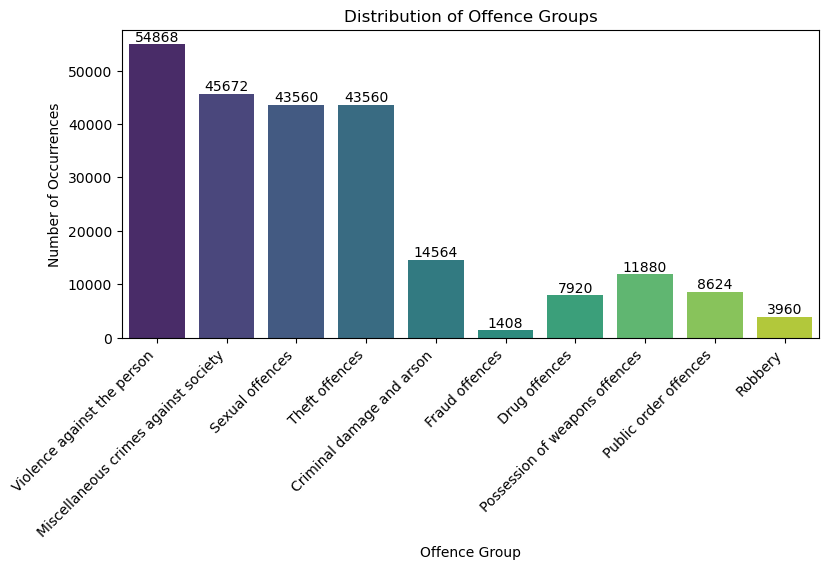

In [59]:
# Explore the distribution of 'offence_group'
plt.figure(figsize=(9, 4))

ax=sns.countplot(x='offence_group', data=new_data,palette='viridis')

#pass ax variable to conatiner to show the values on bar e.g 54868
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Distribution of Offence Groups')
plt.xlabel('Offence Group')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()



Research Question 2: Compare the number of offences across different police forces?/
                     Which force_name has the highest or lowest impact on reducing specific offence groups? 

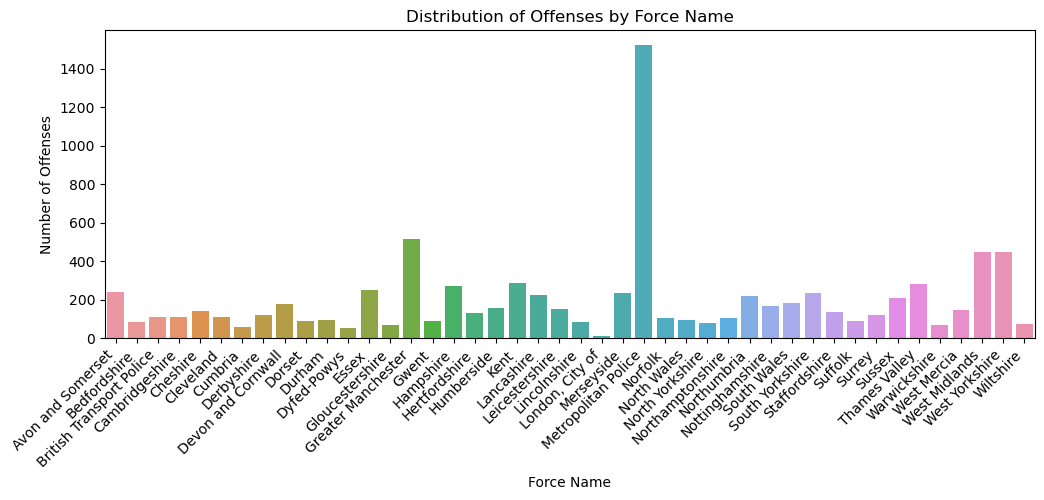

Force with the highest number of offenses: Metropolitan Police


In [60]:
# Visualization for Offenses by Force Name
plt.figure(figsize=(12, 4))
sns.barplot(x='force_name', y='number_of_offences', data=new_data, errorbar=None)
plt.title('Distribution of Offenses by Force Name')
plt.xlabel('Force Name')
plt.ylabel('Number of Offenses')
plt.xticks(rotation=45, ha='right')
plt.show()

# Identify Force with the Highest Number of Offenses
force_max_offenses = new_data.groupby('force_name')['number_of_offences'].sum().idxmax()
print(f"Force with the highest number of offenses: {force_max_offenses}")


Research Question 3: How have the overall crime rates changed over different financial years?

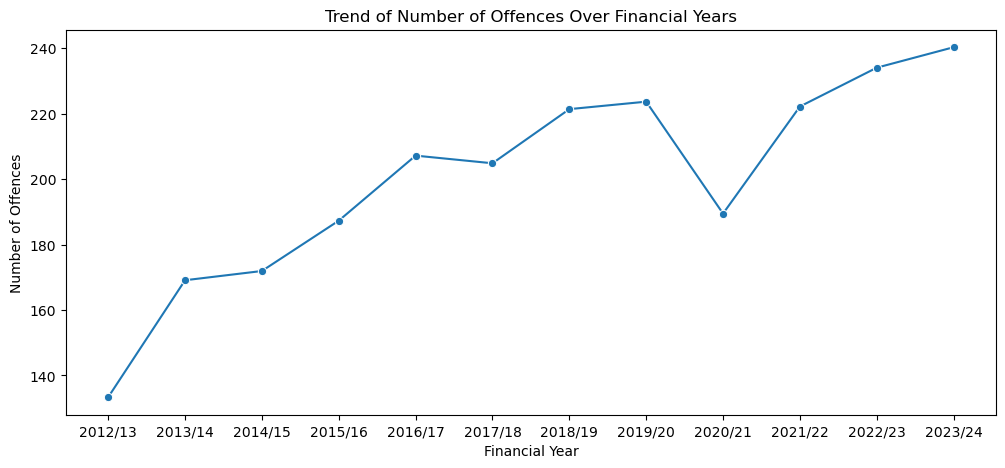

In [61]:
# Explore the relationship between 'financial_year' and 'number_of_offences'
plt.figure(figsize=(12, 5))
sns.lineplot(x='financial_year', y='number_of_offences', data=new_data, errorbar=None, marker='o')
plt.title('Trend of Number of Offences Over Financial Years')
plt.xlabel('Financial Year')
plt.ylabel('Number of Offences')
plt.show()

Insight: There is a steady increase in the number of offences over the financial years,
indicating a potential upward trend in overall crime rates.

Research Question 4:How have the overall crime rates changed over different financial years and quarters?

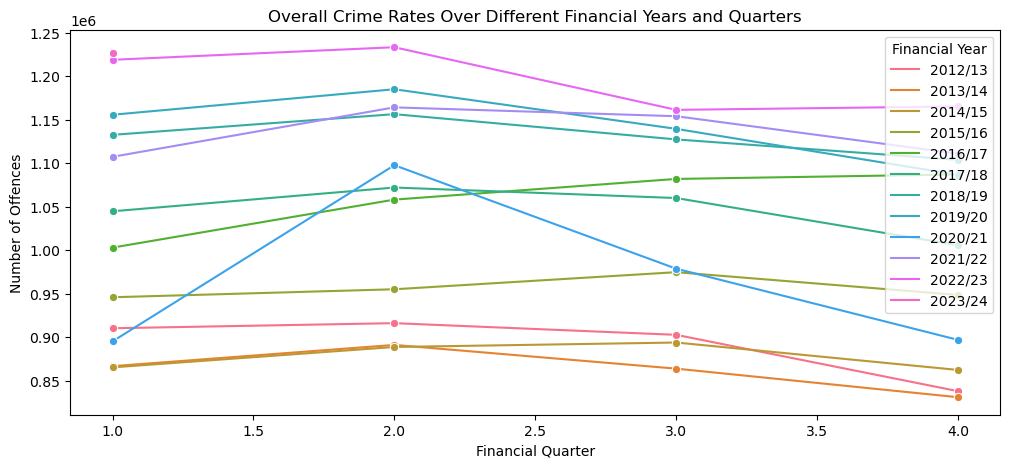

                count        mean           std        min         25%  \
financial_year                                                           
2012/13           4.0   891711.50  36321.832851   837857.0   886459.25   
2013/14           4.0   863088.50  24703.546041   830906.0   855554.00   
2014/15           4.0   877502.25  16058.263363   862273.0   864493.75   
2015/16           4.0   956053.75  13033.392814   945878.0   947875.25   
2016/17           4.0  1057573.00  38518.678196  1002981.0  1044383.25   
2017/18           4.0  1045633.25  28881.349892  1005685.0  1034997.25   
2018/19           4.0  1130130.75  21549.774916  1103944.0  1121556.25   
2019/20           4.0  1141786.75  41299.739857  1086669.0  1126345.50   
2020/21           4.0   967133.50  95426.497262   895161.0   896440.50   
2021/22           4.0  1134217.25  29177.597712  1107435.0  1110139.50   
2022/23           4.0  1194802.00  36796.019123  1161410.0  1164364.25   
2023/24           1.0  1226754.00     

In [62]:

crime_rates_over_time = new_data.groupby(['financial_year', 'financial_quarter'])['number_of_offences'].sum().reset_index()

# Line Plot
plt.figure(figsize=(12, 5))
sns.lineplot(x='financial_quarter', y='number_of_offences', hue='financial_year', data=crime_rates_over_time, marker='o')
plt.title('Overall Crime Rates Over Different Financial Years and Quarters')
plt.xlabel('Financial Quarter')
plt.ylabel('Number of Offences')
plt.legend(title='Financial Year', loc='upper right')
plt.show()



# Summary statistics
summary_stats = crime_rates_over_time.groupby('financial_year')['number_of_offences'].describe()
print(summary_stats)

Insights: The above line plot illustrates 
the overall trend in crime rates across year 2022/23 gradually decreased from 1 to 4 quarter.

Research Question 5: Explore the distribution of offences across different quarters?

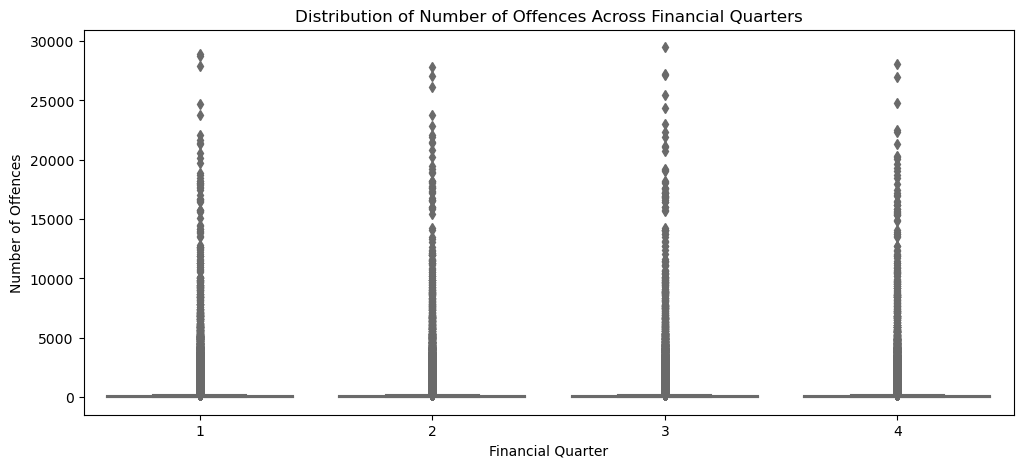

In [185]:

plt.figure(figsize=(12, 5))
sns.boxplot(x='financial_quarter', y='number_of_offences', data=new_data, palette='Set3')
plt.title('Distribution of Number of Offences Across Financial Quarters')
plt.xlabel('Financial Quarter')
plt.ylabel('Number of Offences')
plt.show()

Research Question 6: What is the Impact of Financial Year on Different Offence Groups?

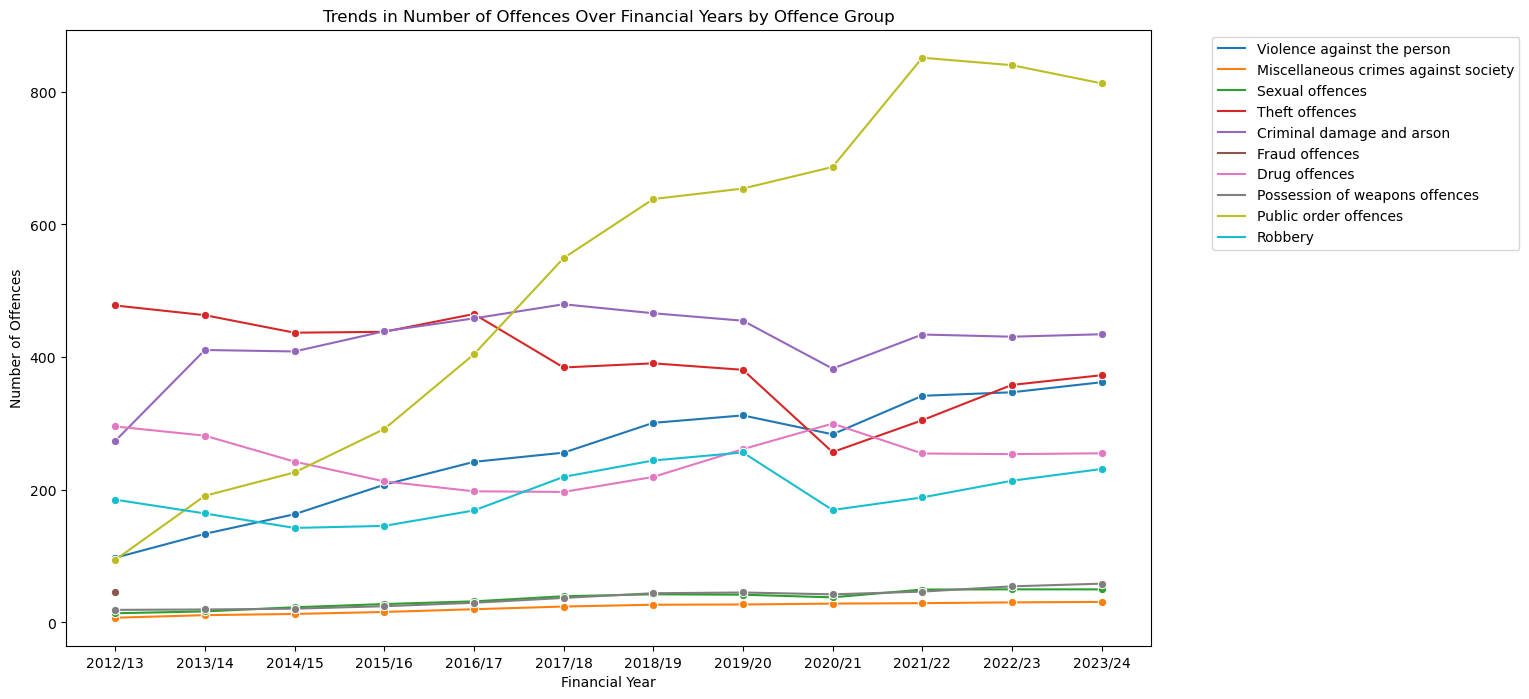

In [186]:
# Impact of Financial Year on Different Offence Groups
plt.figure(figsize=(14, 8))
sns.lineplot(x='financial_year', y='number_of_offences', hue='offence_group', 
             data=new_data, errorbar=None, marker='o', palette='tab10')
plt.title('Trends in Number of Offences Over Financial Years by Offence Group')
plt.xlabel('Financial Year')
plt.ylabel('Number of Offences')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




Insight: While overall crime rates increased, the trends vary across offence groups. 
    For example, 'Public Order' offences might show a significant increase, 
    while 'Miscellaneous crimes against societ' crimes remain relatively stable.

Research Question 8: Are there unique trends or patterns in crime rates for each police force?

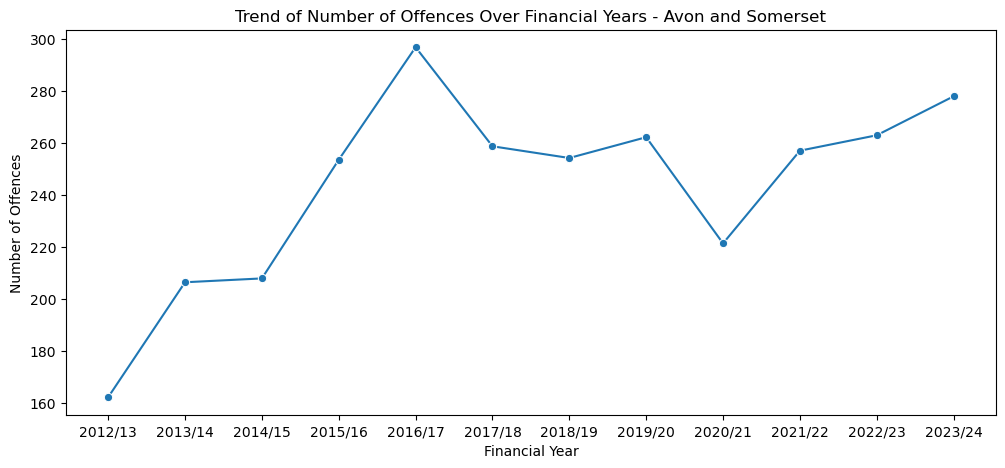

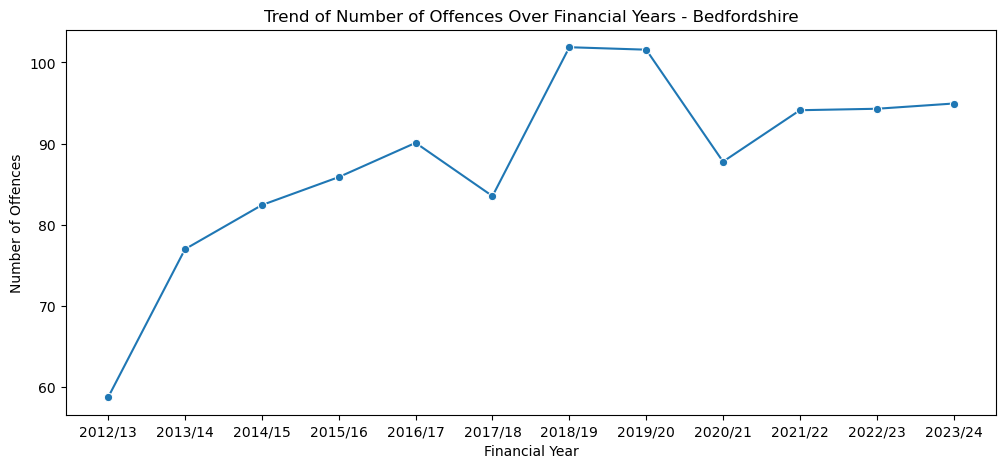

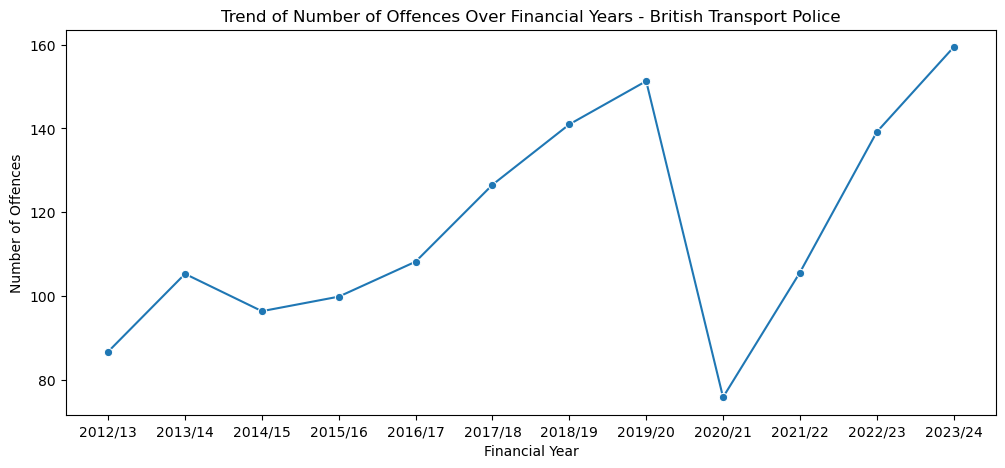

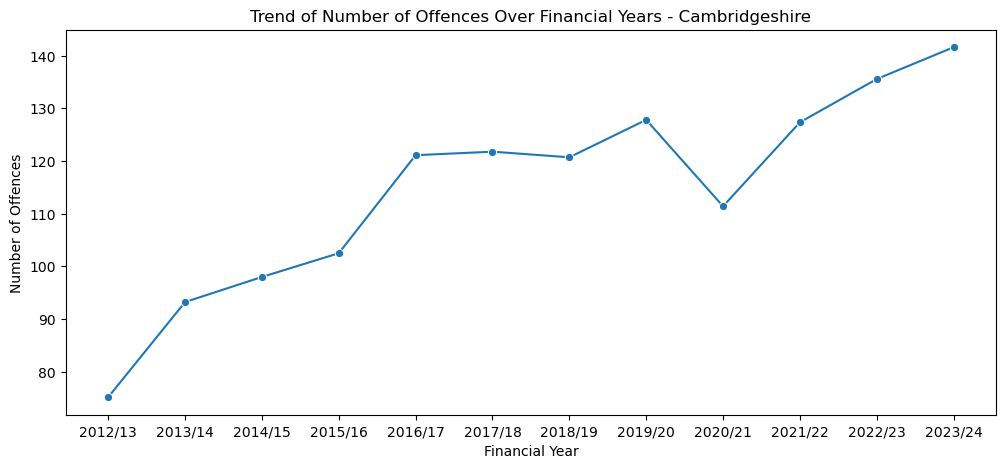

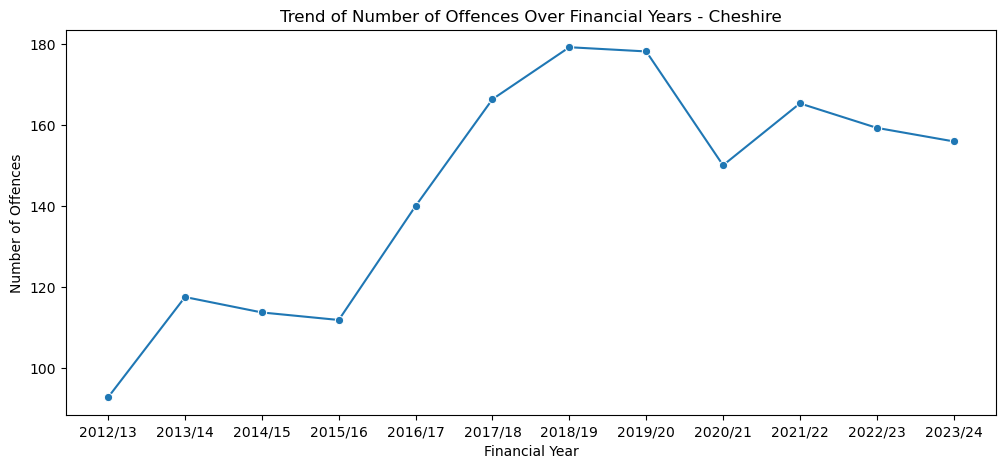

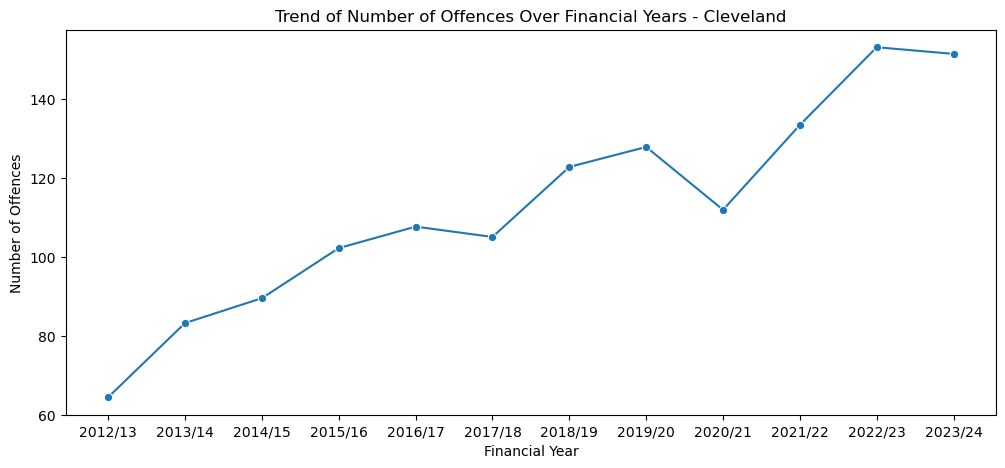

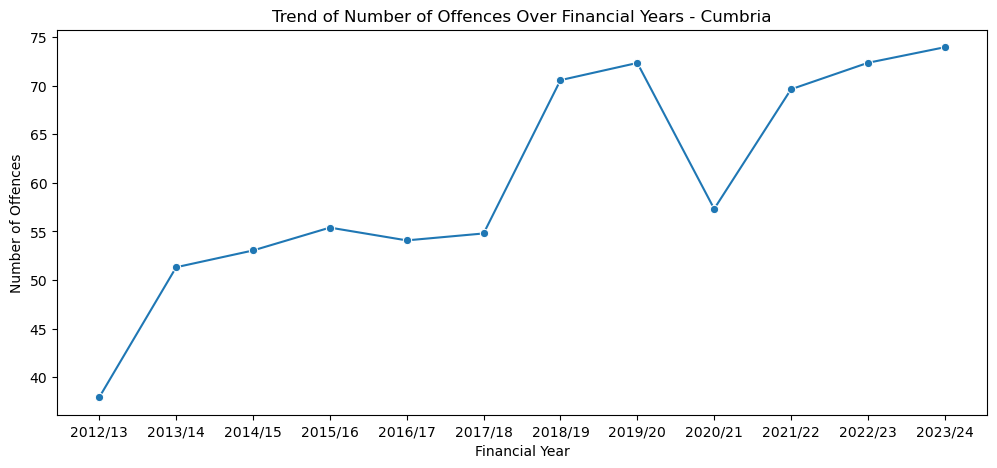

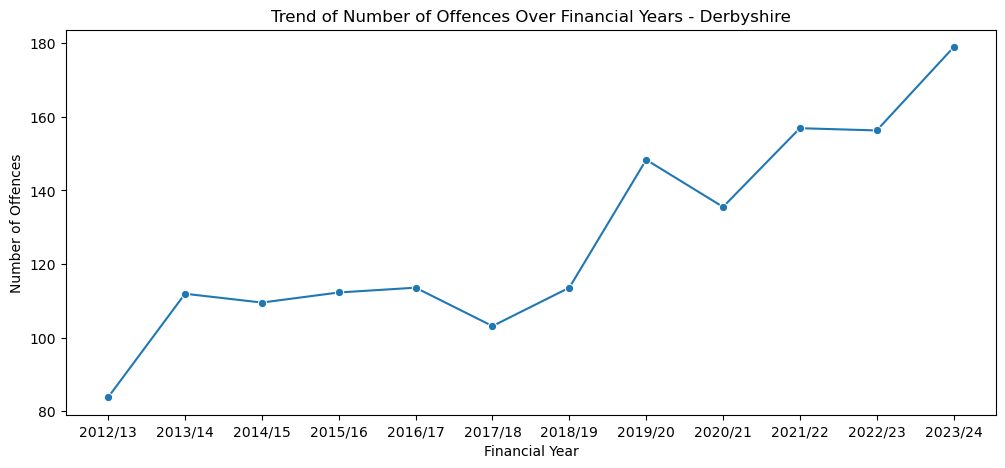

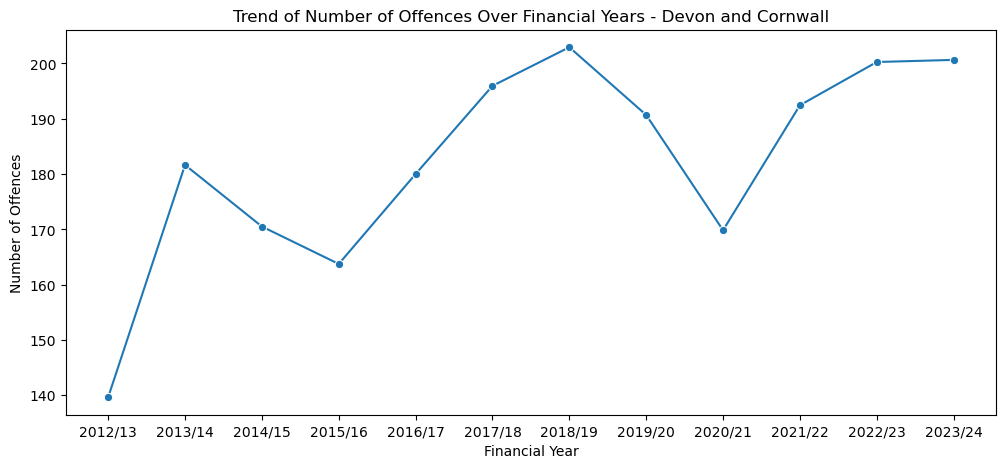

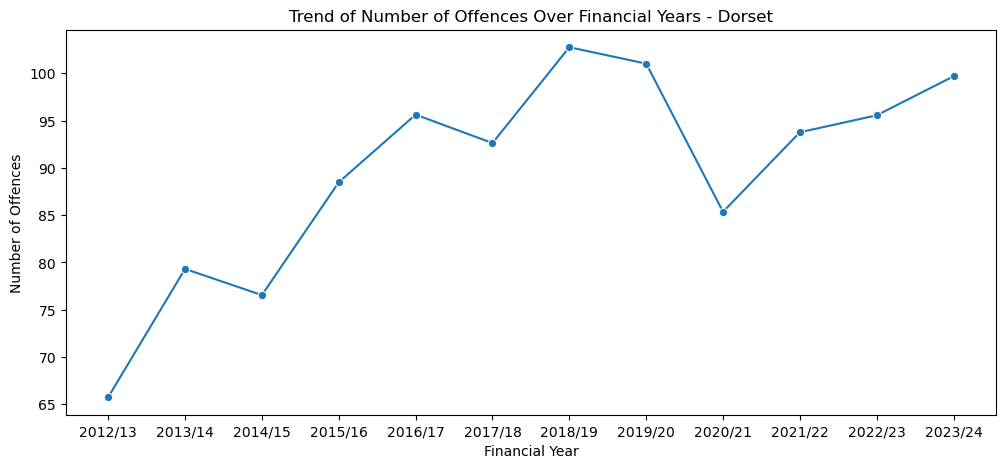

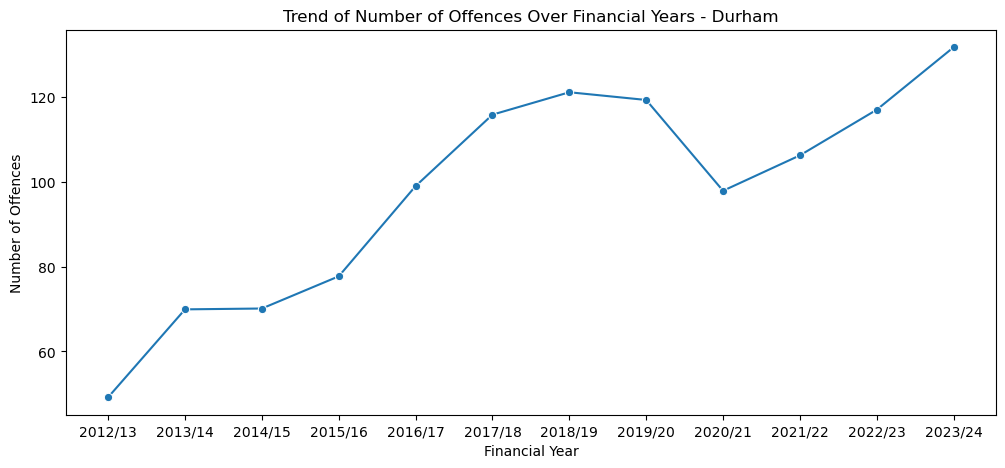

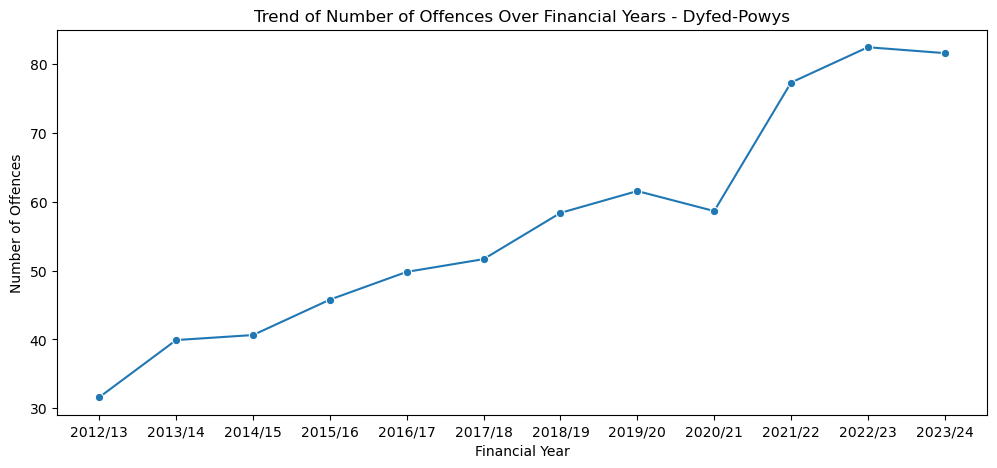

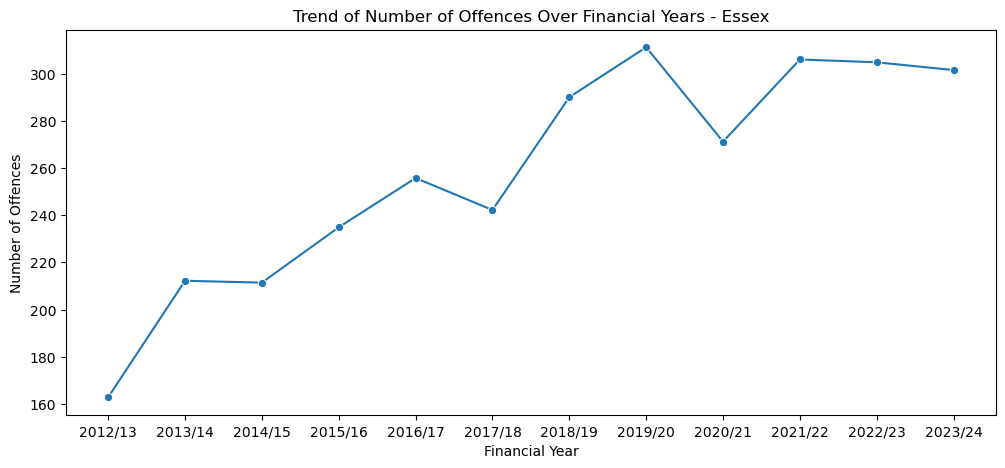

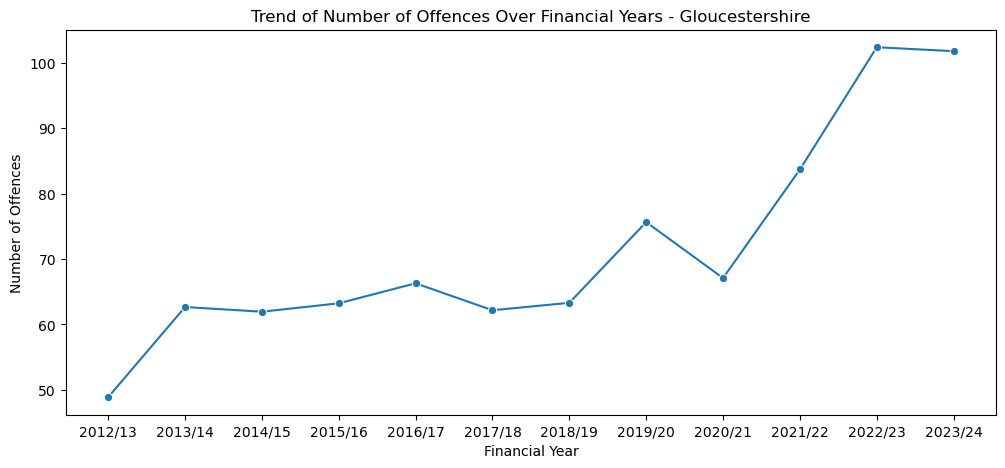

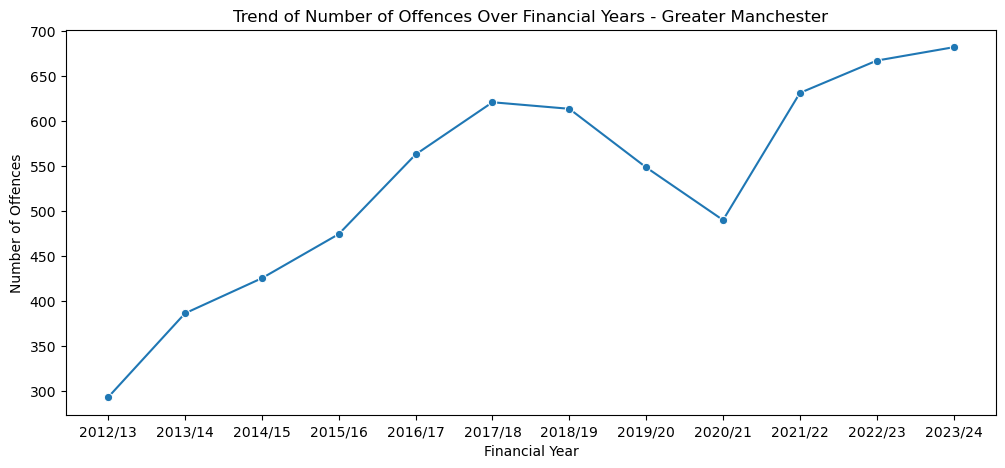

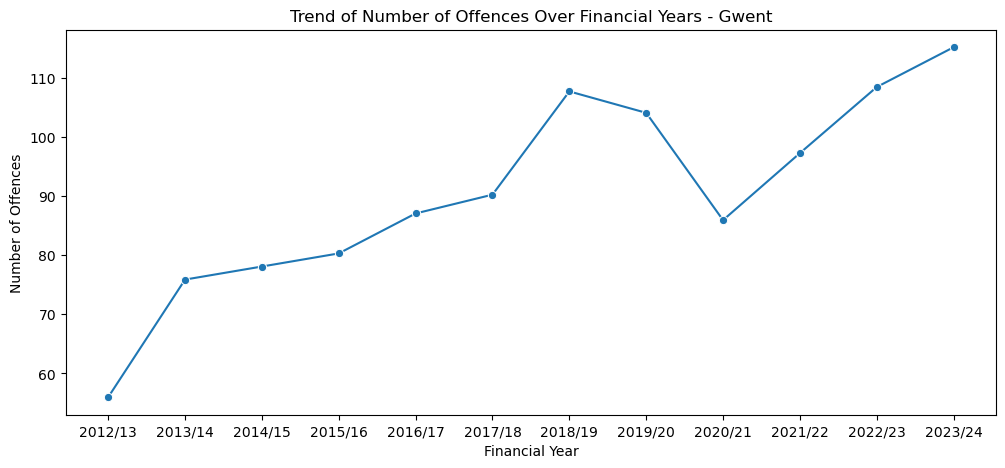

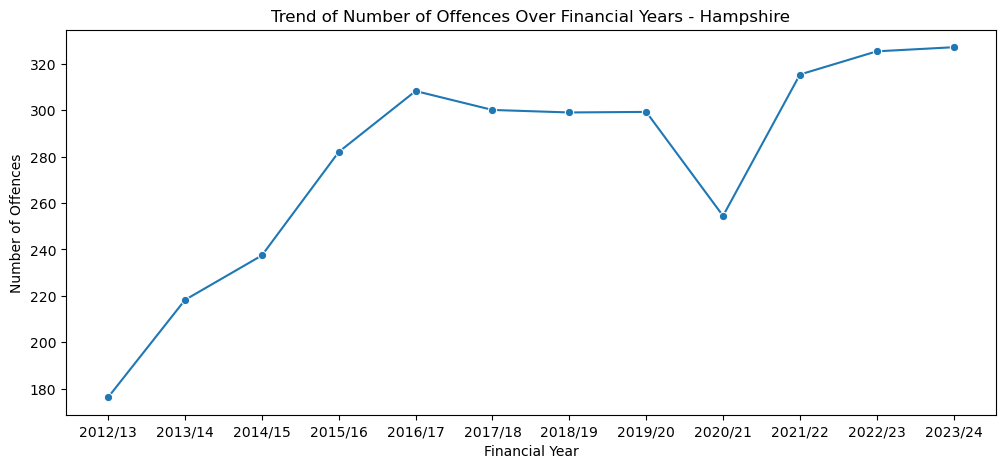

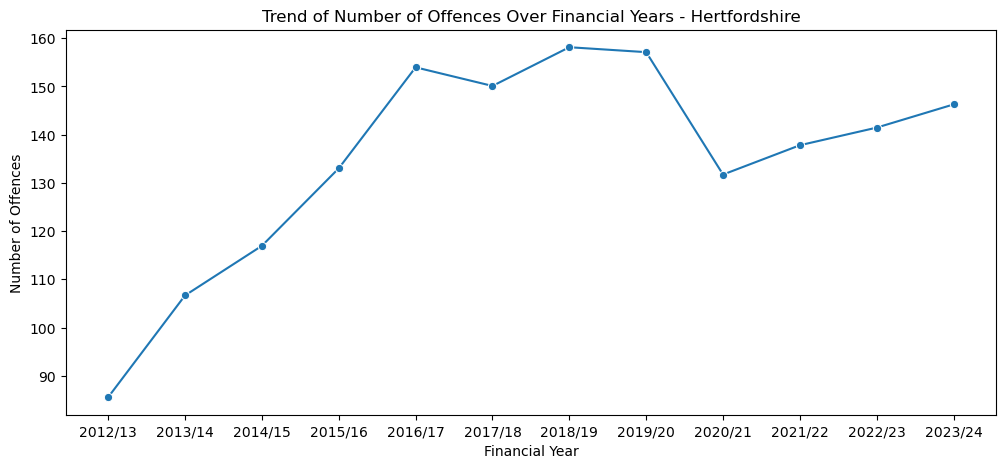

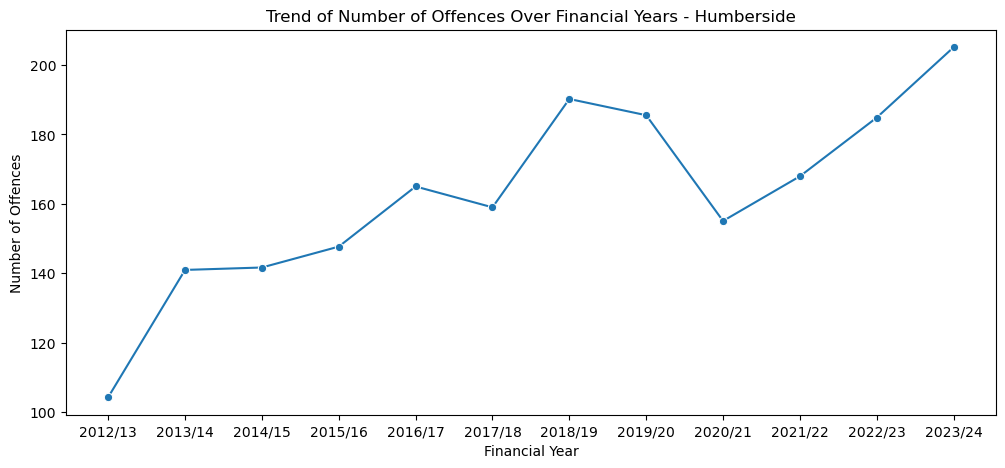

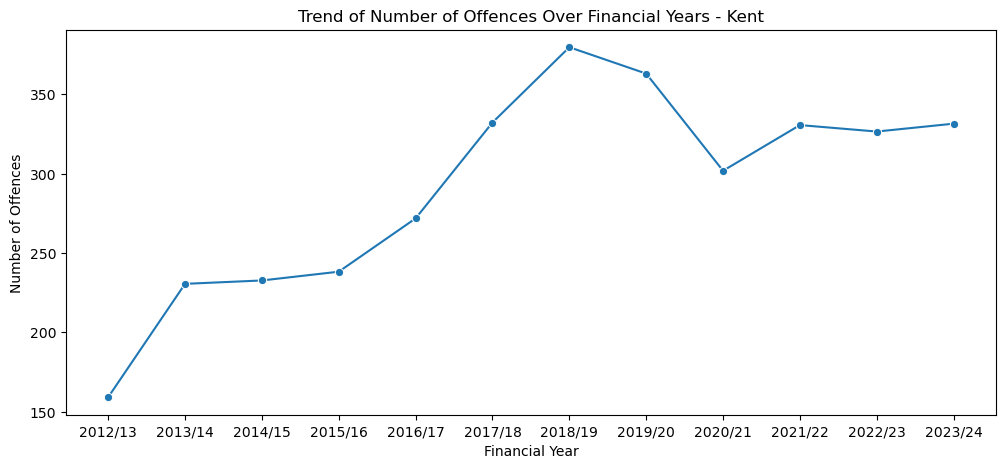

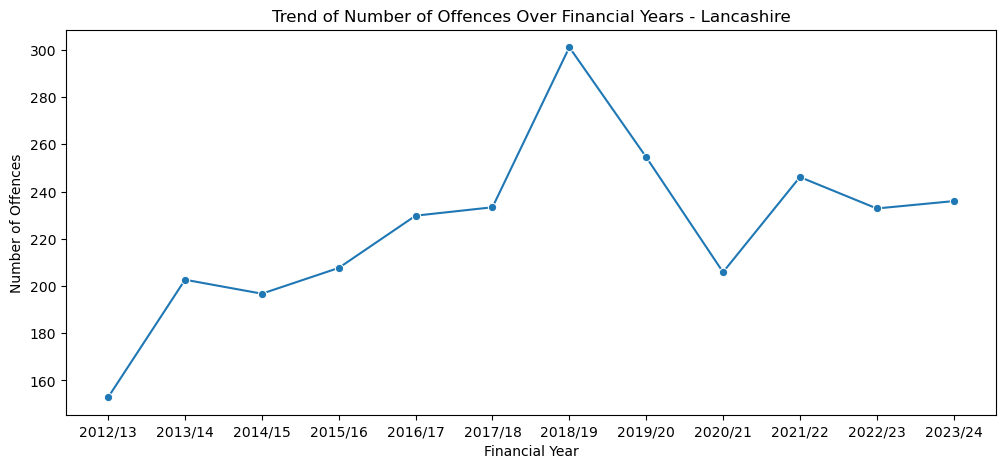

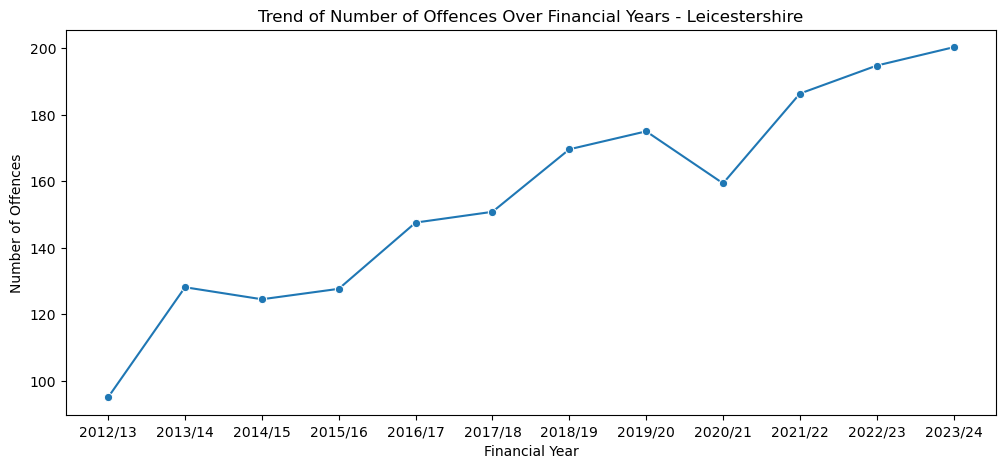

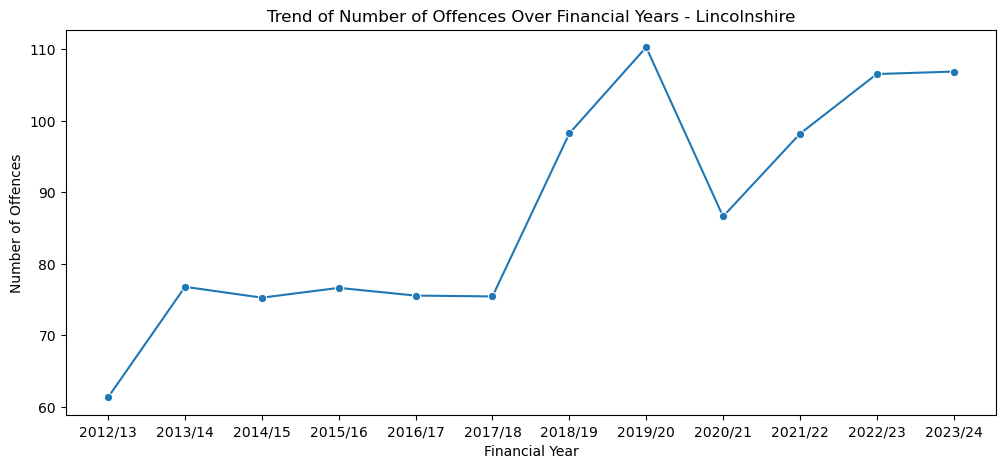

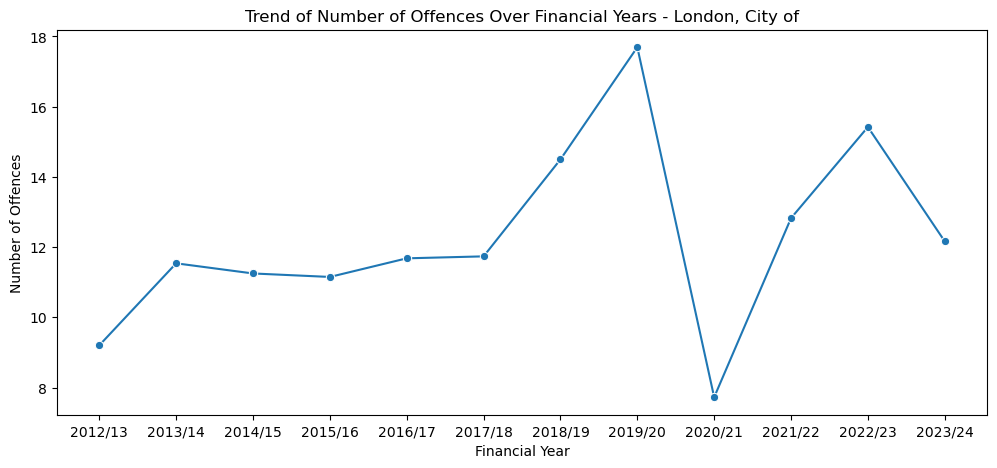

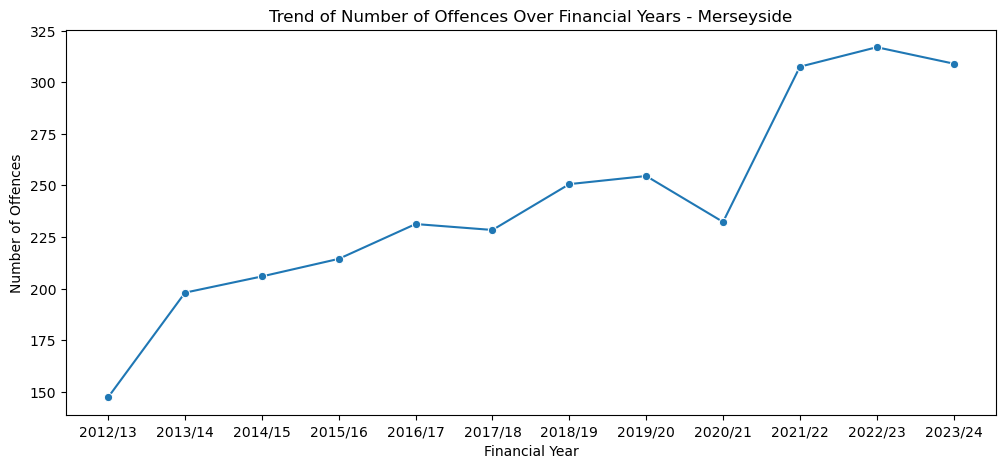

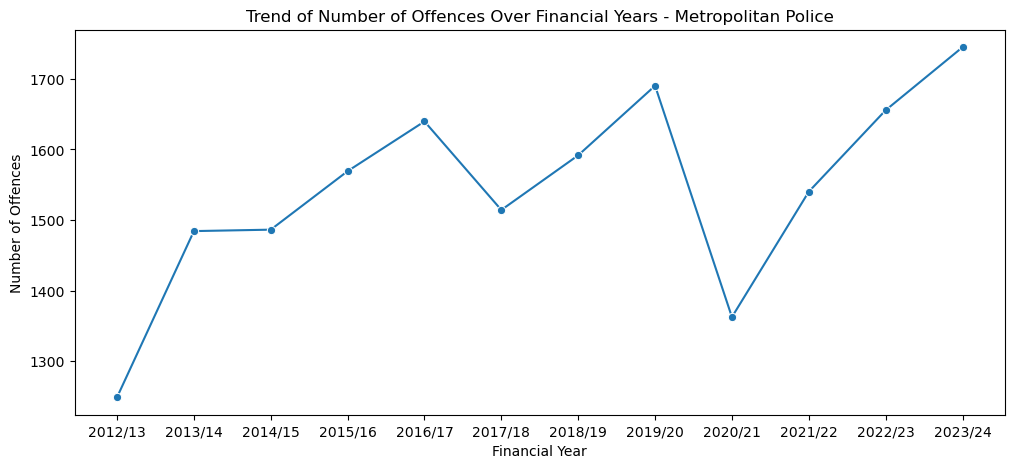

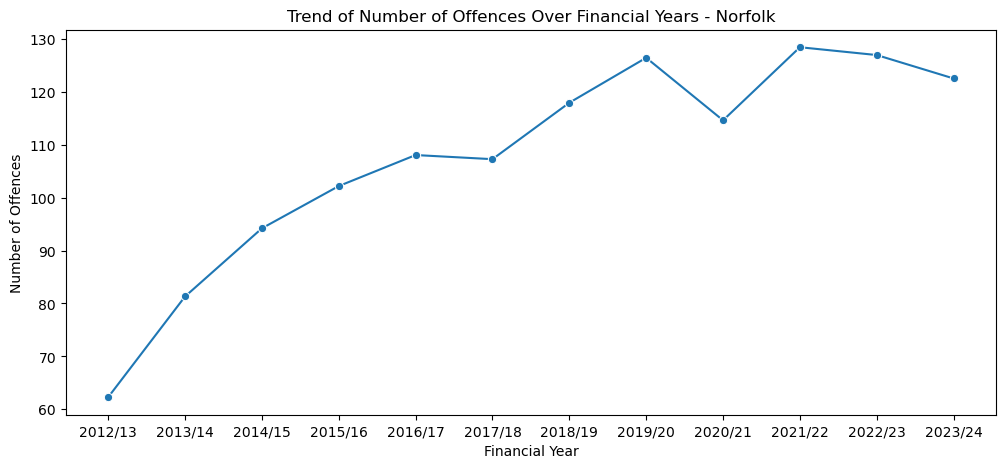

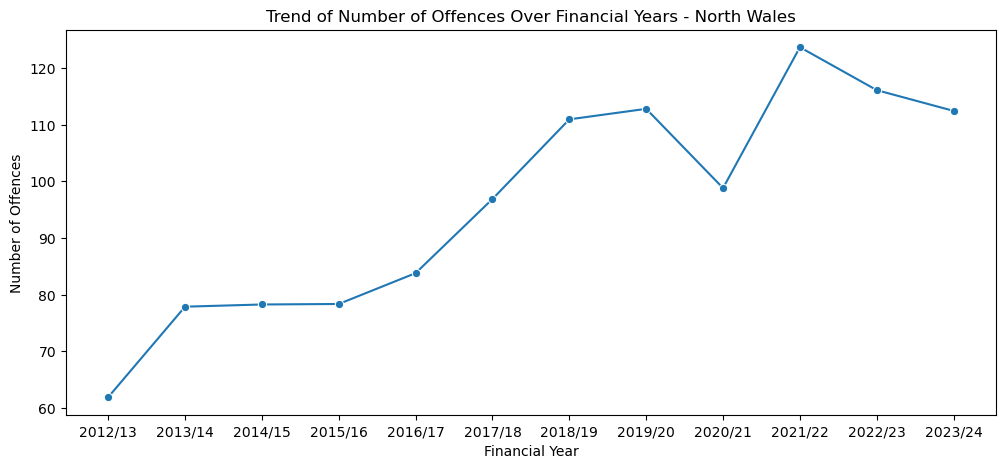

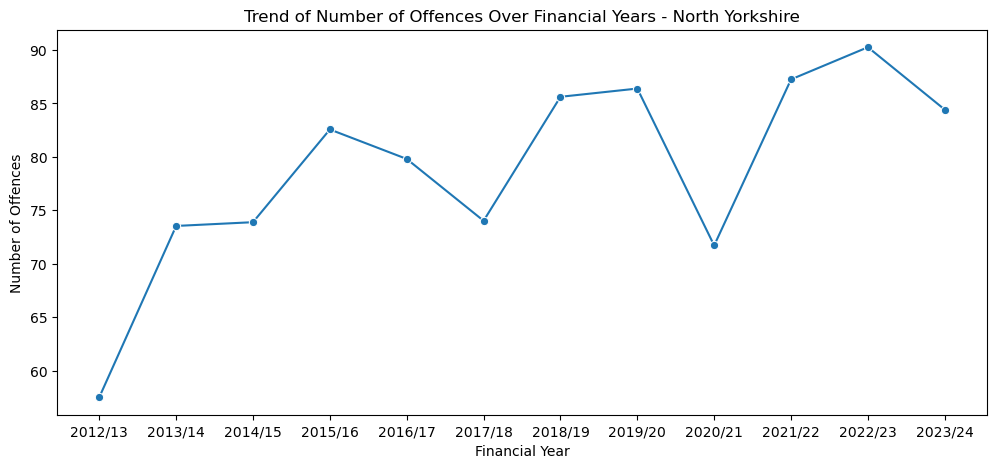

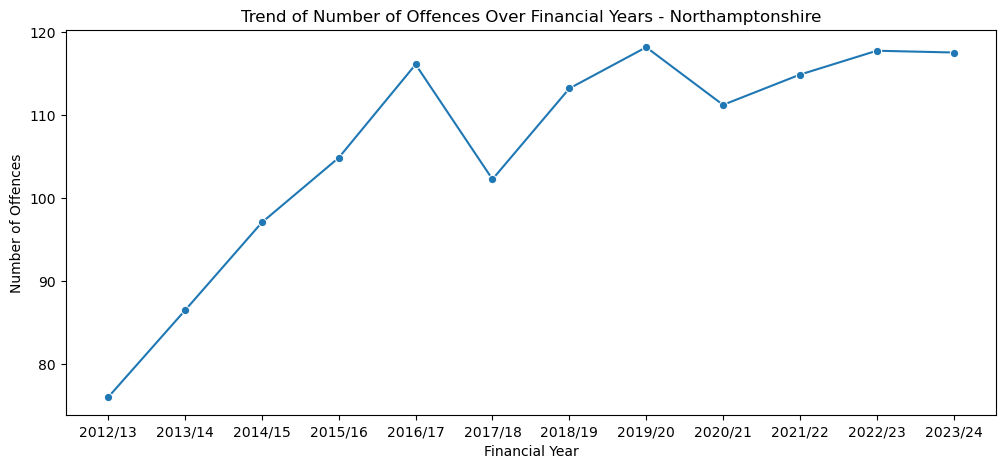

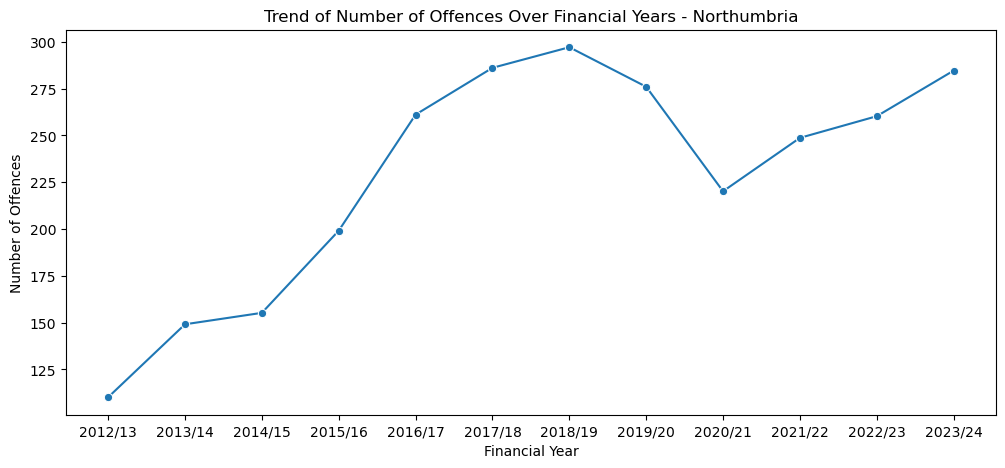

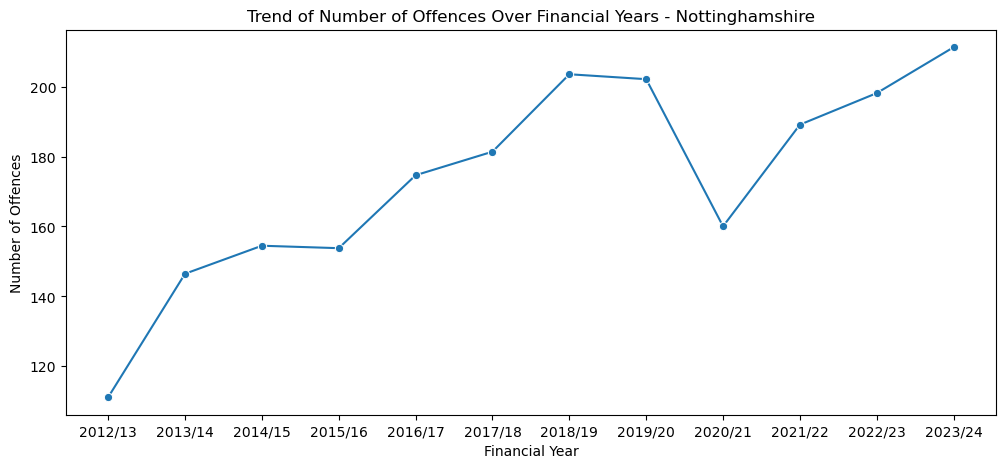

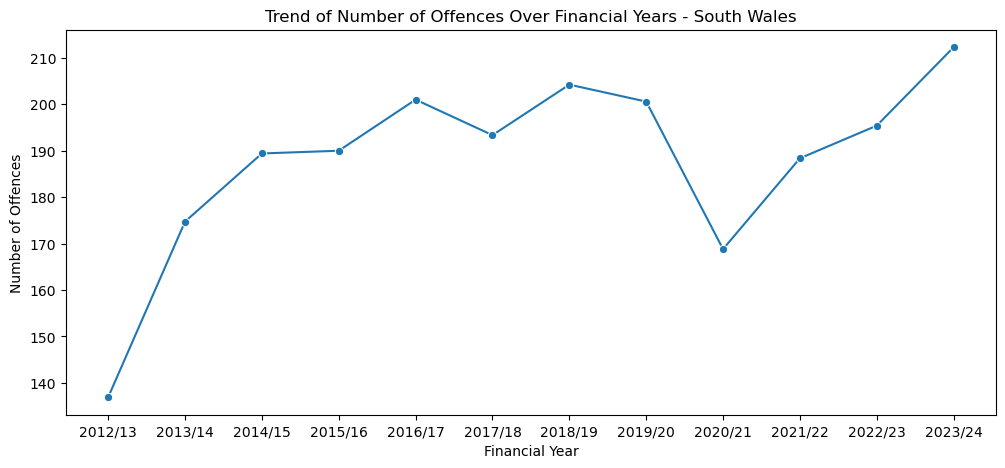

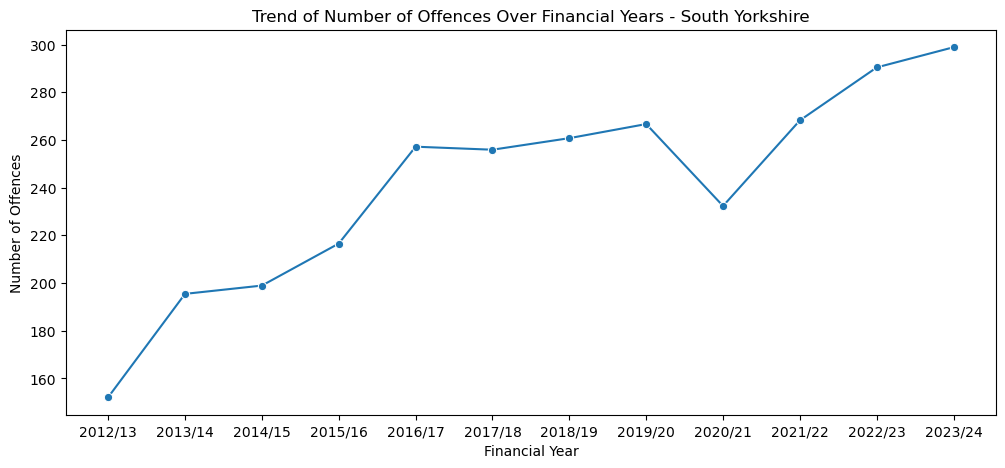

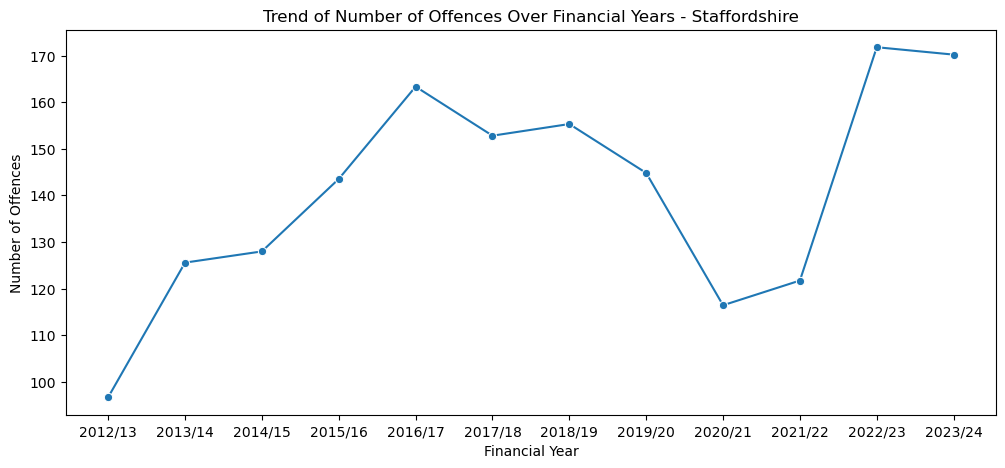

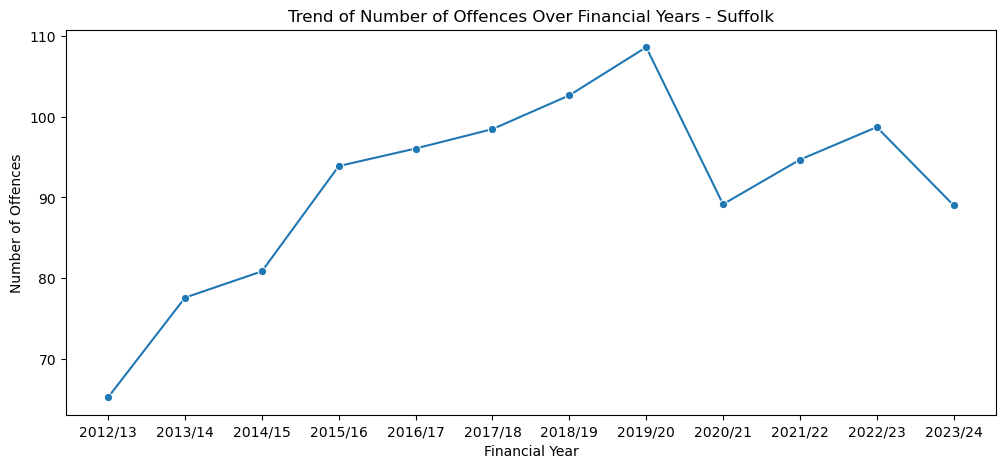

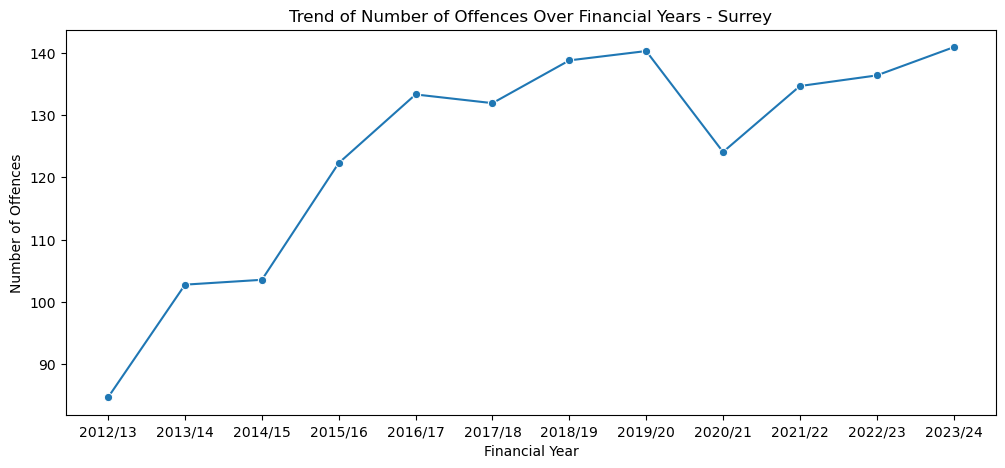

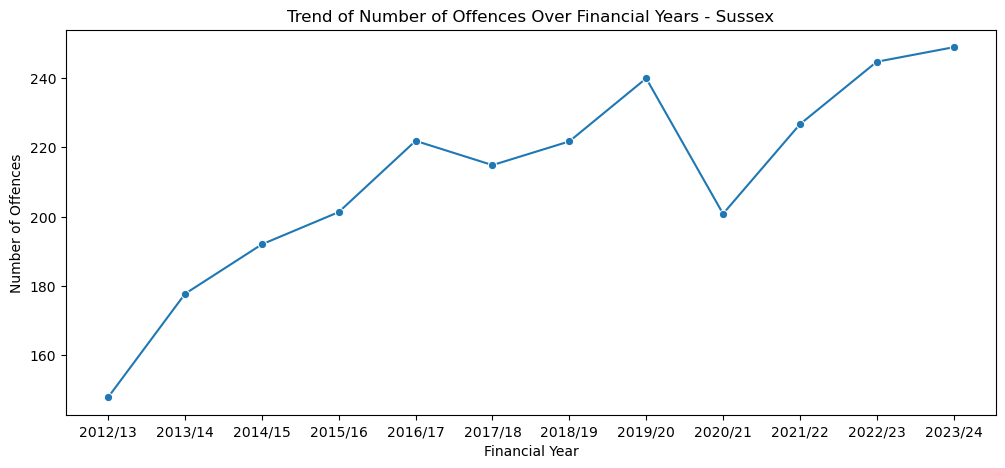

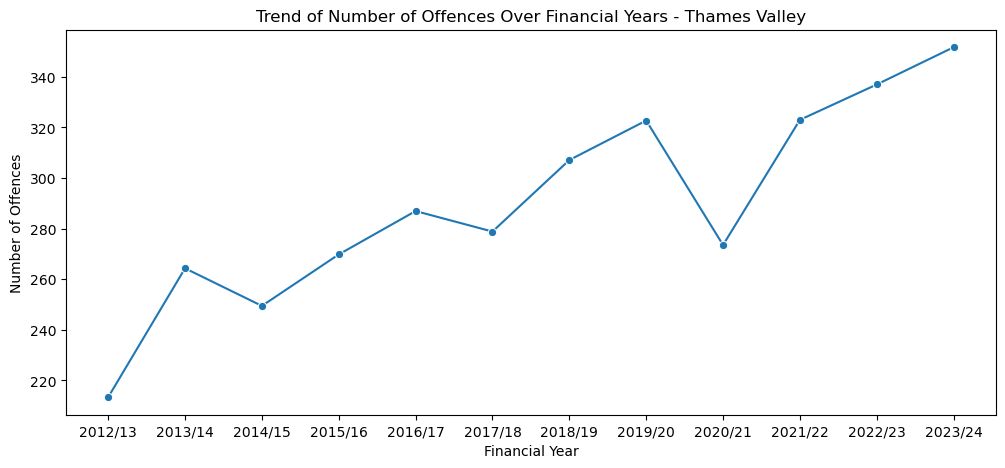

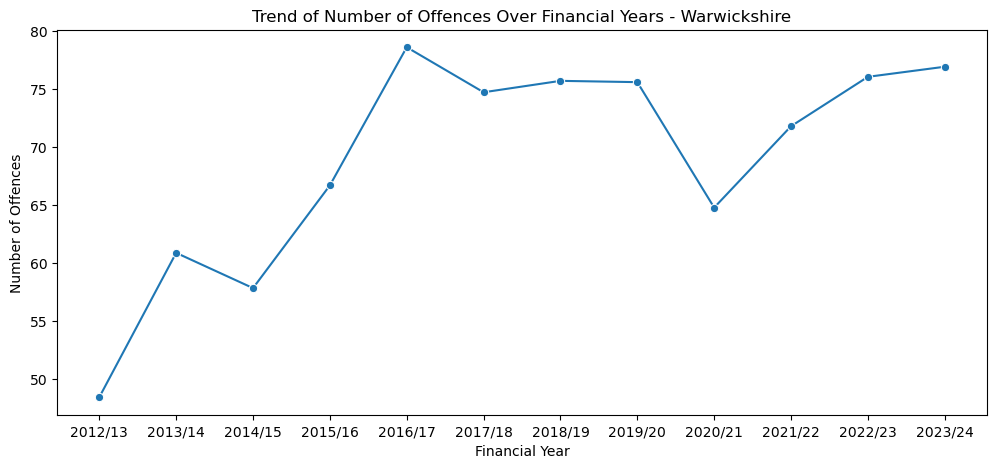

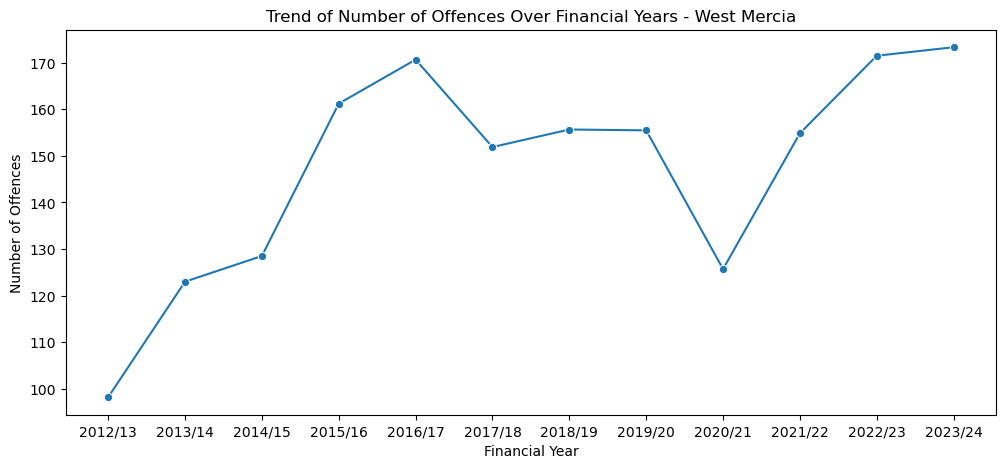

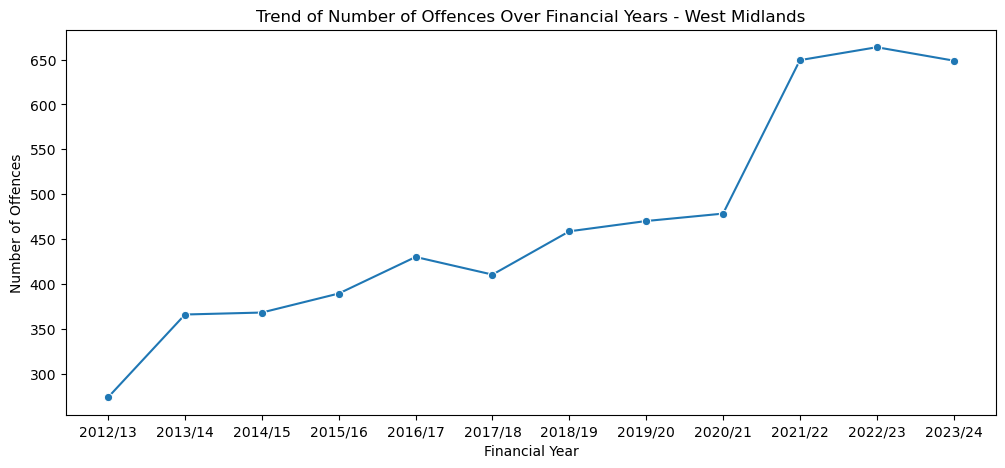

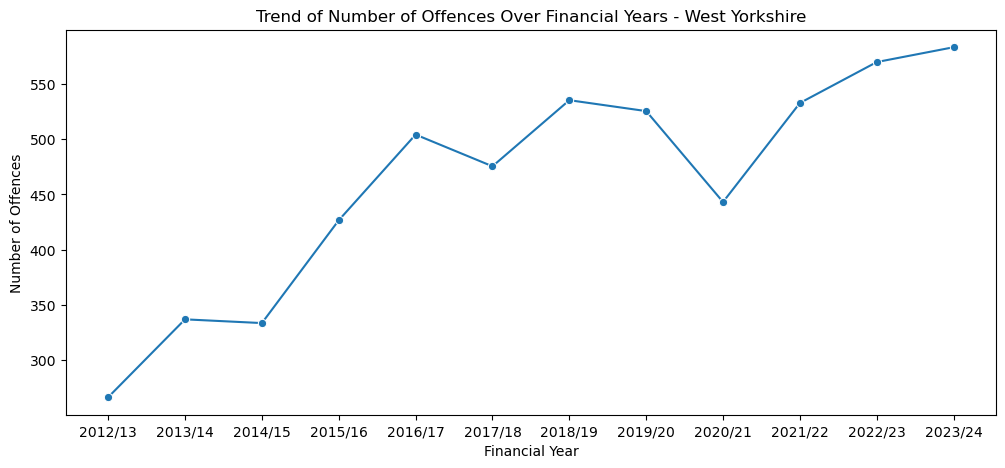

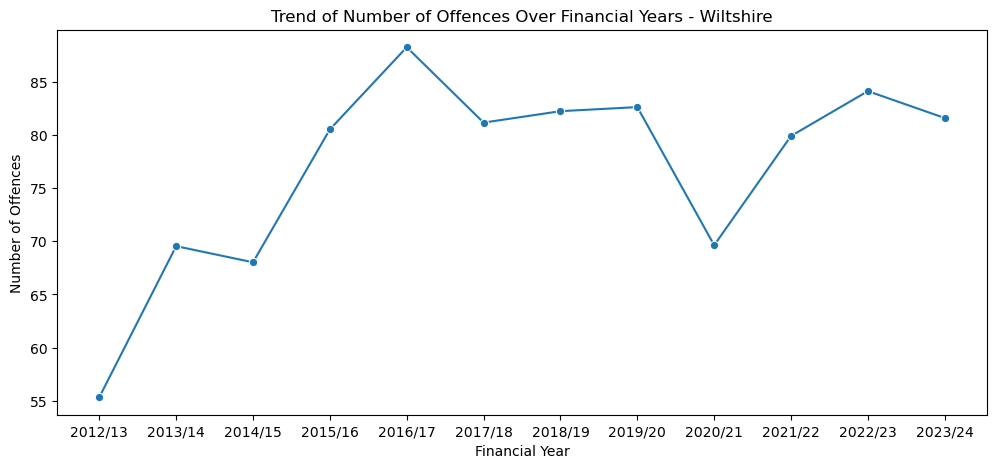

In [187]:
#  Force-specific Trends
forces = new_data['force_name'].unique()
for force in forces:
    force_data = new_data[new_data['force_name'] == force]
    plt.figure(figsize=(12, 5))
    sns.lineplot(x='financial_year', y='number_of_offences', data=force_data, errorbar=None, marker='o')
    plt.title(f'Trend of Number of Offences Over Financial Years - {force}')
    plt.xlabel('Financial Year')
    plt.ylabel('Number of Offences')
    plt.show()

Insight: Each police force exhibits unique trends, indicating that factors such as local demographics, 
    socio-economic conditions, and policing strategies contribute to variations in crime rates.

# Machine Learning Algorithm:

In [188]:
# Importing libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [189]:
# Linear Regression
target_column = 'number_of_offences'
X = new_data.drop(columns=[target_column])
y = new_data[target_column]

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create a pipeline with preprocessing and linear regression
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Create a pipeline with preprocessing and decision tree regression
tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])


Linear Regression Metrics:
Mean Squared Error: 421308.16
R-squared: 0.42


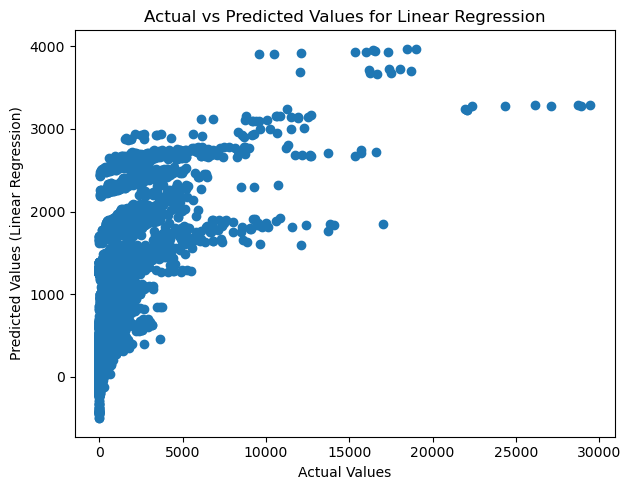

In [199]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
linear_model.fit(X_train, y_train)

# Make predictions on the test set for linear model
y_pred_linear = linear_model.predict(X_test)
 # Evaluate the linear regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Display metrics for linear model
print("\nLinear Regression Metrics:")
print(f"Mean Squared Error: {mse_linear:.2f}")
print(f"R-squared: {r2_linear:.2f}")


# Plot the predicted vs actual values for both models
plt.figure(figsize=(12, 5))
# Linear Regression plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Linear Regression)")
plt.title("Actual vs Predicted Values for Linear Regression")
plt.tight_layout()
plt.show()

In [200]:
# Fit the decision tree regression model
tree_model.fit(X_train, y_train)

# Make predictions on the test set for decision tree model
y_pred_tree = tree_model.predict(X_test)

# Evaluate the decision tree regression model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)


print("\nDecision Tree Regression Metrics:")
print(f"Mean Squared Error: {mse_tree:.2f}")
print(f"R-squared: {r2_tree:.2f}")



Decision Tree Regression Metrics:
Mean Squared Error: 15990.93
R-squared: 0.98


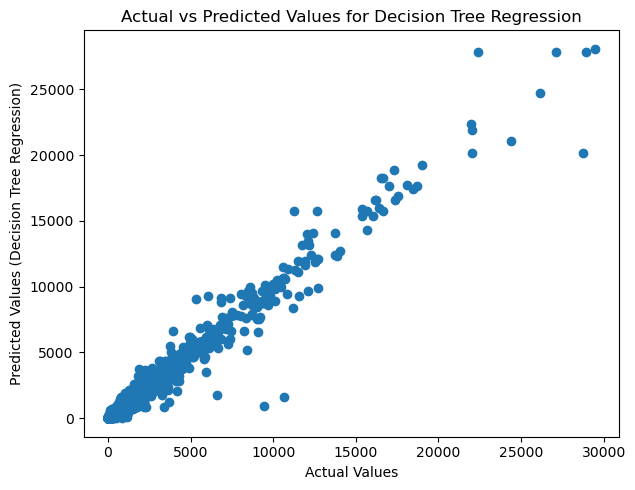

In [203]:
# Plot the predicted vs actual values for model
plt.figure(figsize=(12, 5))
# Decision Tree Regression plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tree)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Decision Tree Regression)")
plt.title("Actual vs Predicted Values for Decision Tree Regression")

plt.tight_layout()
plt.show()